# ENTREGABLE 4

# El set de datos

Número de Instancias:

El conjunto de datos Iris consta de 150 muestras de flores Iris con 4 características cada una.

Características:

* Longitud del sépalo (sepal length)
* Ancho del sépalo (sepal width)
* Longitud del pétalo (petal length)
* Ancho del pétalo (petal width)

Clases o Etiquetas:

* Setosa
* Versicolor
* Virginica



In [33]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [34]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Objetivo

Generar un model de clasificación capaz de predecir la clase de flor en función de las carácterísticas del dataset

* Aplicar las técnicas oportunas de procesamiento de datos

* Valorar diferentes modelos de clasificación

* Comparación entre modelos

* Ensemble

* Métricas

* Conclusiones finales

## CREAMOS LAS PARTICIONES

In [35]:
x = iris_df.drop(['target'], axis = 1)
y = iris_df['target']

In [36]:
from sklearn.model_selection import train_test_split


'''Crear los sets de entrenamiento (70%), validación (15%)
    y prueba (15%)'''

x_train, x_test_val, y_train, y_test_val = train_test_split(x, y, test_size=0.3, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, test_size=0.5, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(105, 4) (105,)
(22, 4) (22,)
(23, 4) (23,)


## NORMALIZACIÓN DE LAS PARTICIONES

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
def escalar_datos(xtr, xvl, xts):
    '''Escalar datos de entrada (entrenamiento, validación y prueba)
    en el rango de 0 a 1'''
    scaler = MinMaxScaler()

    xtr_s = scaler.fit_transform(xtr)

    xvl_s = scaler.transform(xvl)
    xts_s = scaler.transform(xts)

    return xtr_s, xvl_s, xts_s

x_train_s, x_val_s, x_test_s = escalar_datos(x_train, x_test, x_val)

print(x_train_s.min(axis=0),x_train_s.max(axis=0))
print(x_val_s.min(axis=0),x_val_s.max(axis=0))
print(x_test_s.min(axis=0),x_test_s.max(axis=0))

[0. 0. 0. 0.] [1. 1. 1. 1.]
[ 0.02941176  0.27272727 -0.01785714  0.        ] [1.         0.81818182 1.03571429 0.91666667]
[0.17647059 0.09090909 0.03571429 0.        ] [1.05882353 1.09090909 0.94642857 0.91666667]


### DECISION TREE

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

decision_tree_model = DecisionTreeClassifier(random_state = 42)
decision_tree_model.fit(x_train_s, y_train)

y_pred = decision_tree_model.predict(x_val_s)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

Confusion Matrix:
[[13  0  0]
 [ 0  3  0]
 [ 0  0  6]]


### KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

Confusion Matrix:
[[13  0  0]
 [ 0  3  0]
 [ 0  0  6]]


### RANDOM FOREST

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_val, y_pred))

conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Confusion Matrix:
[[ 6  0  0]
 [ 0 10  0]
 [ 0  0  7]]


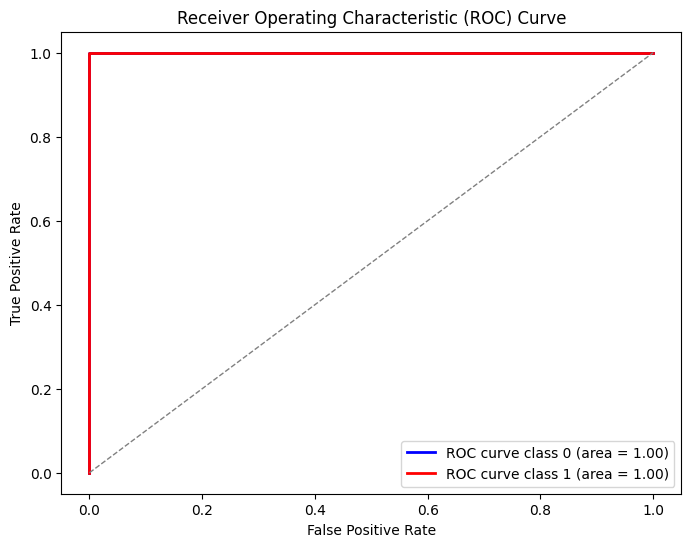

In [42]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_val_binarized = label_binarize(y_val, classes=[0, 1])

y_prob = rf_model.predict_proba(x_val)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2): 
    fpr[i], tpr[i], _ = roc_curve(y_val_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], color='blue', lw=2, label='ROC curve class 0 (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='red', lw=2, label='ROC curve class 1 (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [43]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_val_binarized[:, 0], y_prob[:, 0])
print("AUC:", auc_score)


AUC: 1.0


In [44]:
#tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
#specificity = tn / (tn + fp)
#print("Specificity:", specificity)

In [45]:
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf_model, x_train, y_train, cv=5)

print("Cross Validation Scores:", scores)

print("Mean Accuracy:", scores.mean())


Cross Validation Scores: [0.95238095 0.9047619  0.9047619  1.         0.95238095]
Mean Accuracy: 0.9428571428571428


### XGBOOST

In [46]:
!pip3 install xgboost

In [47]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_val, y_pred))

conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Confusion Matrix:
[[ 6  0  0]
 [ 0 10  0]
 [ 0  0  7]]


### SVM

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_val, y_pred))

conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Confusion Matrix:
[[ 6  0  0]
 [ 0 10  0]
 [ 0  0  7]]


### ISOLATION FOREST

In [49]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report

isolation_forest_model = IsolationForest(random_state=42)
isolation_forest_model.fit(x_train)

y_pred_train = isolation_forest_model.predict(x_train)
y_pred_test = isolation_forest_model.predict(x_test)

print("Training Set:")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train))

print("\nTest Set:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Training Set:
Confusion Matrix:
[[ 0  0  0  0]
 [12  0 19  0]
 [ 6  0 31  0]
 [13  0 24  0]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00        31
           1       0.42      0.84      0.56        37
           2       0.00      0.00      0.00        37

    accuracy                           0.30       105
   macro avg       0.10      0.21      0.14       105
weighted avg       0.15      0.30      0.20       105


Test Set:
Confusion Matrix:
[[0 0 0 0]
 [4 0 9 0]
 [0 0 3 0]
 [1 0 5 0]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00        13
           1       0.18      1.00      0.30         3
           2       0.00      0.00      0.00         6

    accuracy                           0.14        22
   macro avg       0.04 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

### ENSAMBLE

In [50]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

ensemble_model = VotingClassifier(estimators=[('svm', svm_model), ('rf', rf_model), ('dt', dt_model)], voting='hard')
ensemble_model.fit(x_train, y_train)

y_pred = ensemble_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

Confusion Matrix:
[[13  0  0]
 [ 0  3  0]
 [ 0  0  6]]


### NAIVE BAYES

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_model = GaussianNB()

nb_model.fit(x_train, y_train)

y_pred = nb_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

Confusion Matrix:
[[13  0  0]
 [ 0  3  0]
 [ 0  0  6]]


In [52]:
# GRID SEARCH

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

nb_model = GaussianNB()

params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search = GridSearchCV(estimator=nb_model, param_grid=params, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Best Parameters: {'var_smoothing': 1e-09}
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

Confusion Matrix:
[[13  0  0]
 [ 0  3  0]
 [ 0  0  6]]


# Conclusiones

Gracias al análisis de la clasificación realizado, hemos podido obtener las siguientes conclusiones:

1. Variedad de algoritmos: Existen numerosos algoritmos de clasificación en machine learning, cada uno con sus propias fortalezas y debilidades. Algunos de los algoritmos más comunes incluyen SVM, árboles de decisión, k-NN, Xgboost, entre otros.
   
2. Tener en cuenta siempre el preprocesamiento de datos: El preprocesamiento de datos juega un papel crucial en la clasificación efectiva. Esto puede incluir la normalización de características, el manejo de valores faltantes, la codificación de variables categóricas y la selección de características relevantes. (A PESAR DE QUE NO ERA OBJETO EN ESTE NOTEBOOK NI EN ESTE DATASET)
   
3. Evaluación de modelos: Es importante evaluar correctamente el rendimiento de los modelos de clasificación. Esto se puede hacer utilizando métricas como precisión, exhaustividad, F1-score, área bajo la curva ROC (AUC-ROC), Confusion Matrix, entre otras. La elección de la métrica adecuada depende del contexto del problema y de las preferencias del usuario.

4. Tuning de hiperparámetros: Ajustar los hiperparámetros de los modelos es crucial para maximizar su rendimiento. Esto se puede hacer utilizando técnicas de búsqueda de hiperparámetros como la búsqueda en cuadrícula, la búsqueda aleatoria o la optimización bayesiana.
   
5. Interpretación de modelos: La interpretación de modelos de clasificación es importante para entender cómo toman decisiones y para ganar insights sobre los datos. Algunos modelos, como árboles de decisión y regresión logística, son más interpretables que otros, ya que, su entendimiento es mas sencillo

En resumen, la clasificación en machine learning es un campo amplio y fascinante que requiere una comprensión profunda de los algoritmos, técnicas de preprocesamiento de datos, evaluación de modelos y estrategias para abordar desafíos específicos del problema, en el que siempre escogeremos los que mejor se adapten a nuestros datos y mejores scores nos aporten.